In [1]:
!pip install keras

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
adm_df = pd.read_csv('/content/drive/MyDrive/ml_assinments/assin_3/Admission_Predict_A3.csv')

In [5]:
adm_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
X = adm_df.iloc[:, 1:-1]
y = adm_df.iloc[:, -1]

X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [7]:
# Check for any missing values
print(adm_df.isnull().sum())

# Example: filling NaNs with column mean
adm_df.fillna(adm_df.mean(), inplace=True)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [8]:
print(adm_df.describe())


       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

GRE Score: Skewness = -0.04, Kurtosis = -0.71
TOEFL Score: Skewness = 0.10, Kurtosis = -0.65
University Rating: Skewness = 0.09, Kurtosis = -0.81
SOP: Skewness = -0.23, Kurtosis = -0.71
LOR : Skewness = -0.15, Kurtosis = -0.75
CGPA: Skewness = -0.03, Kurtosis = -0.56
Research: Skewness = -0.24, Kurtosis = -1.95

Range of features:
GRE Score: Range = 50
TOEFL Score: Range = 28
University Rating: Range = 4
SOP: Range = 4.0
LOR : Range = 4.0
CGPA: Range = 3.12
Research: Range = 1


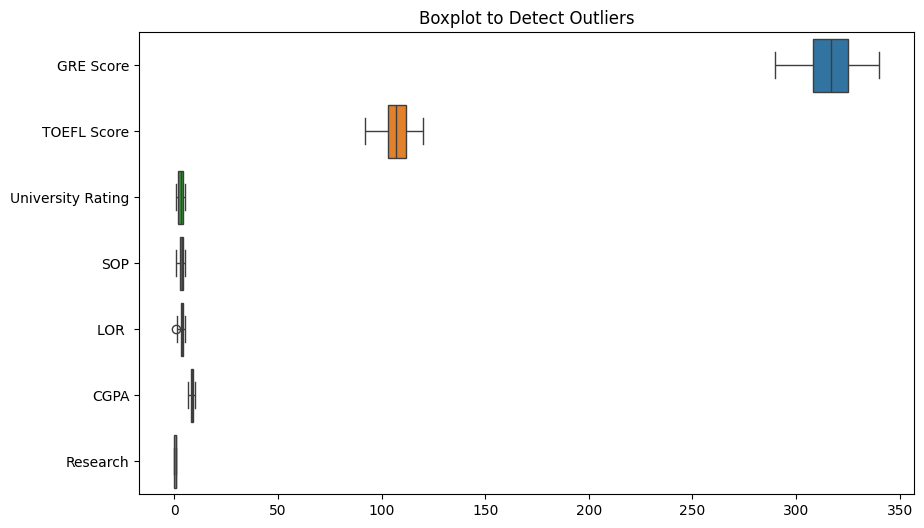

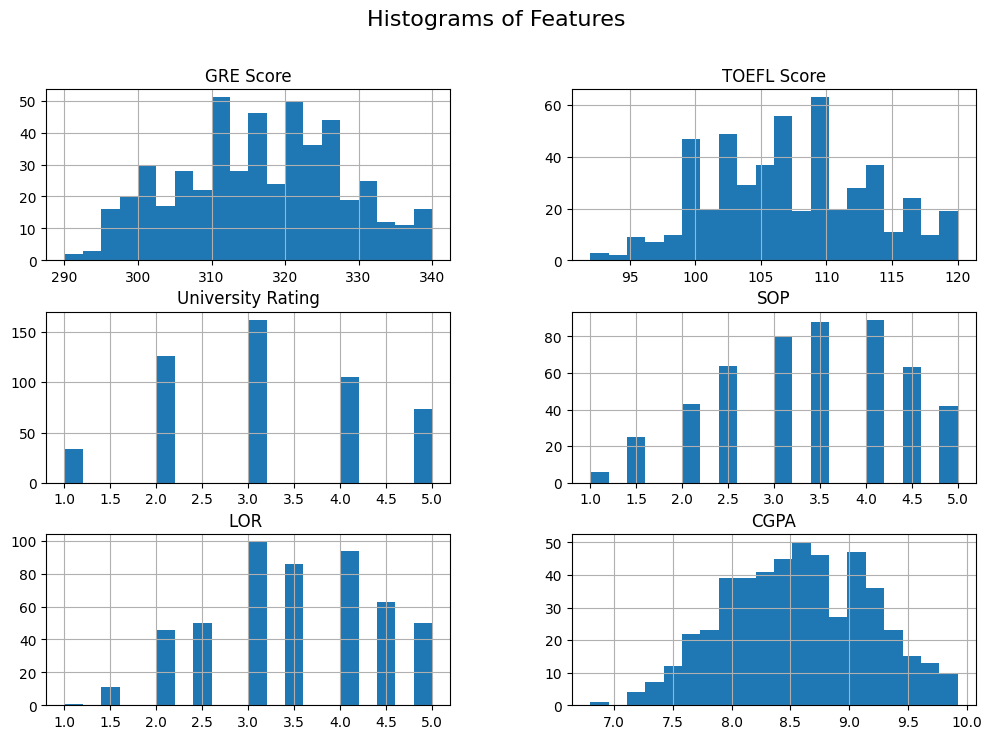

In [9]:
#data visualization

# wide range-minmax scaler
# wide range and normalized distribution-standard scaler
# range is heavily influenced by outliers-Robust scaler


#1.skewness of the data-low skewness implies less outliers

for feature in X:
    skewness = adm_df[feature].skew()
    kurtosis = adm_df[feature].kurtosis()

    print(f"{feature}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")


#2. range of features
import seaborn as sns


print("\nRange of features:")
for feature in X:
    feature_range = adm_df[feature].max() - adm_df[feature].min()
    print(f"{feature}: Range = {feature_range}")

#3. Presence of Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, orient="h")
plt.title("Boxplot to Detect Outliers")
plt.show()

# 4. Distribution Visualizations (Histograms)

features_to_analyze = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

adm_df[features_to_analyze].hist(bins=20, figsize=(12, 8), layout=(3, 2))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()


Skewness close to 0 indicates normal distribution (suitable for StandardScaler).
Absolute skewness > 1 suggests the data is skewed (consider MinMaxScaler or RobustScaler).

For normal distribution (bell curve), StandardScaler is ideal.
For skewed distributions, consider MinMaxScaler or RobustScaler.

This data is having a normal distribution and doesn't have outliers so we can choose standard scaler





#Data Scaling


MinMaxScalaer

In [10]:
scaler = MinMaxScaler()
scaler.fit(X)
minMax_X = scaler.transform(X)


In [11]:
minMax_X=pd.DataFrame(minMax_X)
minMax_X.head()


,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


RobustScaler

In [12]:
scaler = RobustScaler()
scaler.fit(X)
robust_X = scaler.transform(X)


In [13]:
robust_X=pd.DataFrame(robust_X)
robust_X.head()

,0,1,2,3,4,5,6
0,1.176471,1.222222,0.5,0.666667,1.0,1.194521,0.0
1,0.411765,0.000000,0.5,0.333333,1.0,0.339726,0.0
2,-0.058824,-0.333333,0.0,-0.333333,0.0,-0.613699,0.0
3,0.294118,0.333333,0.0,0.000000,-1.0,0.120548,0.0
4,-0.176471,-0.444444,-0.5,-1.000000,-0.5,-0.383562,-1.0


StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X)
standard_X = scaler.transform(X)


In [15]:
scaled_data = pd.DataFrame(standard_X, columns=adm_df.columns[1:-1])

scaled_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [16]:
# how does scaling affect the model performance

By selecting the right scaler based on the data characteristics and model requirements, you can enhance performance and **model robustness**.
Scaling ensures that features are on the same scale, preventing larger-valued features from dominating and **improving model convergence**. It enhances **model accuracy**, particularly for algorithms sensitive to feature magnitude, like gradient descent-based models.


#LDA

In [17]:
categorical_y = y.copy()
#Discritizing the target column
bin_edges = [0.3, 0.5, 0.7, 1.0]
bin_labels = ['Low', 'Medium', 'High']
categorical_y=pd.cut(categorical_y, bins = bin_edges, labels = bin_labels,include_lowest = True)


In [18]:
lda = LDA()
lda_X = lda.fit_transform(standard_X, categorical_y)

# Get explained variance ratio
# explained_variance_ratio = lda_X.explained_variance_ratio_
lda_shape = lda_X.shape
print(lda_shape)

lda_X_df = pd.DataFrame(lda_X)
print(lda_X_df.head()) # Use head() on the DataFrame





(500, 2)
          0         1
0 -2.759899  0.608028
1 -1.190608 -0.522246
2  0.546877 -1.364605
3 -0.235074 -1.053413
4  1.035402  1.126152


The number of componets are by default taken as min(n_classes-1, n_features) = 2
We take n_components to be 2 as we are dealing with 3 unique classes in the data. The number of LDA components retained should be n-1 based on the number of classes, ensuring maximum class separability and preserving key discriminative information.

This reduces the computational requirement in the later training steps

#Linear Regression

tenserflow Model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(lda_X_df,y, test_size=0.5, random_state=42)

In [20]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [21]:
weights = tf.Variable(tf.random.normal([X_train_tf.shape[1], 1]))
bias = tf.Variable(tf.random.normal([1]))

def linear_regression(X):
  return tf.matmul(X, weights) + bias

def mse_loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.SGD(learning_rate=0.01)


In [22]:
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tf)
        loss = mse_loss(y_train_tf, predictions)
    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 4.061047554016113
Epoch 100, Loss: 0.036310404539108276
Epoch 200, Loss: 0.020535908639431
Epoch 300, Loss: 0.020281249657273293
Epoch 400, Loss: 0.020277032628655434
Epoch 500, Loss: 0.020276963710784912
Epoch 600, Loss: 0.020276961848139763
Epoch 700, Loss: 0.020276956260204315
Epoch 800, Loss: 0.020276956260204315
Epoch 900, Loss: 0.020276956260204315


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = linear_regression(X_test_tf)
y_pred = y_pred.numpy()
r2_score = sklearn.metrics.r2_score(y_test, y_pred)


mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R2: {r2_score}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


R2: -0.025436100286621688
MAE: 0.1121907451915741
MSE: 0.019729326582301945
RMSE: 0.14046112124820143


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


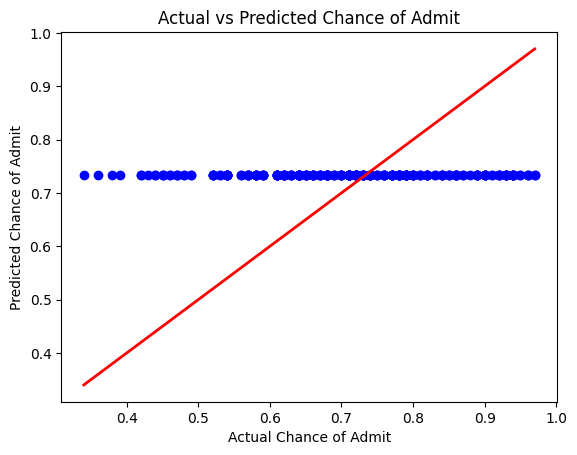

In [24]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs Predicted Chance of Admit')
plt.show()

Scikit-Learn model

In [25]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

r2_score = lr_model.score(X_test, y_test)


mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R2: {r2_score}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


R2: 0.7942304061281464
MAE: 0.045199063269055983
MSE: 0.003958994146071806
RMSE: 0.06292053834855361


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


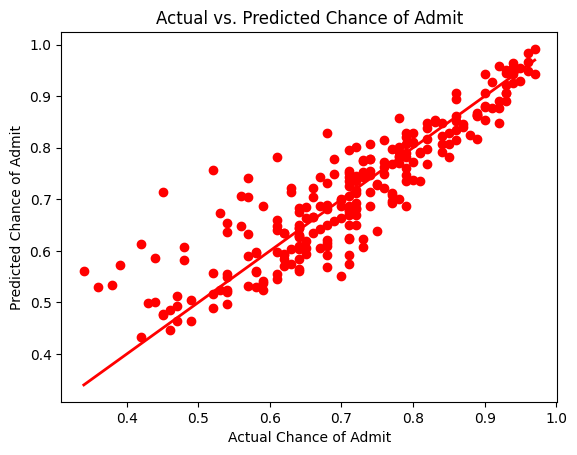

In [26]:
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Chance of Admit')
plt.show()

\Based on evaluation metrics we can conclude the  Scikit-Learn performs better than TensorFlow model and is better at capturing the relations between the features in the data


#Logistic Regression

In [27]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=3)

logistic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, activation='softmax', input_shape=(X_train.shape[1],))
])

logistic_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

logistic_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:

training = logistic_model.fit(
    X_train, y_train_onehot,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test_onehot)
)

loss, accuracy = logistic_model.evaluate(X_test, y_test_onehot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4322 - loss: 1.6941 - val_accuracy: 0.5520 - val_loss: 1.3094
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4774 - loss: 1.4199 - val_accuracy: 0.5840 - val_loss: 1.1556
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4779 - loss: 1.3086 - val_accuracy: 0.6040 - val_loss: 1.0092
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5334 - loss: 1.1474 - val_accuracy: 0.6440 - val_loss: 0.8750
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6218 - loss: 0.9217 - val_accuracy: 0.7080 - val_loss: 0.7570
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6908 - loss: 0.7586 - val_accuracy: 0.7800 - val_loss: 0.6561
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7298 - loss: 0.6881 - val_accuracy: 0.8560 - val_loss: 0.5691
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8004 - loss: 0.5974 - val_accuracy: 0.9360 - val_loss: 0.4978

In [29]:

def tuning_learning_rate(learning_rate):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=3, activation='softmax', input_shape=(X_train.shape[1],))
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  training = model.fit(
      X_train, y_train_onehot,
      epochs=100,
      batch_size=32,
      validation_data=(X_test, y_test_onehot),
      verbose=0
  )

  loss, accuracy = model.evaluate(X_test, y_test_onehot)
  print(f'Learning Rate: {learning_rate}, Test Loss: {loss}, Test Accuracy: {accuracy}')
  return training

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
training_histories = []

for learning_rate in learning_rates:
  history = tuning_learning_rate(learning_rate)
  training_histories.append(history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.4357 
Learning Rate: 0.001, Test Loss: 0.4313550889492035, Test Accuracy: 0.9919999837875366


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0472 
Learning Rate: 0.005, Test Loss: 0.04749056324362755, Test Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0179 
Learning Rate: 0.01, Test Loss: 0.01795882172882557, Test Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 
Learning Rate: 0.05, Test Loss: 0.0013247133465483785, Test Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5750e-04 
Learning Rate: 0.1, Test Loss: 0.00045998257701285183, Test Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.5609e-05 
Learning Rate: 0.5, Test Loss: 1.610979416000191e-05, Test Accuracy: 1.0


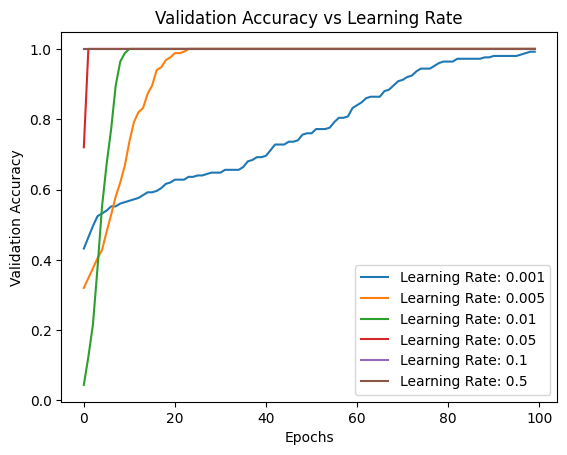

In [30]:
for i, lr in enumerate(learning_rates):
  plt.plot(training_histories[i].history['val_accuracy'], label=f'Learning Rate: {lr}')

plt.title('Validation Accuracy vs Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

RANDOM FOREST


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(lda_X ,categorical_y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)
y_pred_prob_rf = rf_model.predict_proba(X_test_rf)


In [32]:
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Random Forest Accuracy: ", accuracy_rf)

precision_rf = precision_score(y_test_rf, y_pred_rf, average='weighted')
print("Random Forest Precision: ", precision_rf)

recall_rf = recall_score(y_test_rf, y_pred_rf, average='weighted')
print("Random Forest Recall: ", recall_rf)

f1_rf = f1_score(y_test_rf, y_pred_rf, average='weighted')
print("Random Forest F1-Score: ", f1_rf)

# AUC-ROC (since it's a multi-class problem, we calculate the macro-average AUC-ROC) Area Under the Receiver Operating Characteristic Curve
#discriminative ability of a classifier.
auc_roc_rf = roc_auc_score(y_test_rf, y_pred_prob_rf, multi_class='ovr', average='macro')
print("Random Forest AUC-ROC: ", auc_roc_rf)


Random Forest Accuracy:  0.8
Random Forest Precision:  0.7944736842105263
Random Forest Recall:  0.8
Random Forest F1-Score:  0.7943529411764706
Random Forest AUC-ROC:  0.8806262162984851


#Hyperparameter Tuning

In [33]:

def my_model(learning_rate=0.01, regularization_strength=0.01):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=3, activation='softmax', input_shape=(X_train.shape[1],),
                           kernel_regularizer=tf.keras.regularizers.l2(regularization_strength))
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
regularization_strengths = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]



Grid search

In [34]:
grid_search_results = []

for lr in learning_rates:
  for rs in regularization_strengths:
    model = my_model(learning_rate=lr, regularization_strength=rs)
    history = model.fit(
        X_train, y_train_onehot,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test_onehot),
        verbose=0
    )

    loss, accuracy = model.evaluate(X_test, y_test_onehot)
    print(f"Accuracy of the model is {accuracy} with the Loss of {loss}")

    grid_search_results.append({"learning rate": lr, "regularization strength": rs, "accuracy": accuracy, "loss": loss})

grid_search_results = sorted(grid_search_results, key=lambda x: x["accuracy"], reverse=True)

print(grid_search_results[0])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.4556 
Accuracy of the model is 0.9959999918937683 with the Loss of 0.45925578474998474


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.4715 
Accuracy of the model is 0.9639999866485596 with the Loss of 0.45707979798316956


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4282 
Accuracy of the model is 1.0 with the Loss of 0.42219504714012146


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.4486 
Accuracy of the model is 0.9559999704360962 with the Loss of 0.4698711931705475


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4520 
Accuracy of the model is 1.0 with the Loss of 0.45479723811149597


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4468 
Accuracy of the model is 1.0 with the Loss of 0.4488522708415985


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0476 
Accuracy of the model is 1.0 with the Loss of 0.047799788415431976


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0523 
Accuracy of the model is 1.0 with the Loss of 0.05261059105396271


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0488 
Accuracy of the model is 1.0 with the Loss of 0.049036163836717606


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0478 
Accuracy of the model is 1.0 with the Loss of 0.0479557029902935


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0454 
Accuracy of the model is 1.0 with the Loss of 0.04547814279794693


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0471 
Accuracy of the model is 1.0 with the Loss of 0.0471687838435173


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0165 
Accuracy of the model is 1.0 with the Loss of 0.01657872460782528


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0154 
Accuracy of the model is 1.0 with the Loss of 0.015417318791151047


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0160 
Accuracy of the model is 1.0 with the Loss of 0.016009381040930748


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0152 
Accuracy of the model is 1.0 with the Loss of 0.015255417674779892


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0153 
Accuracy of the model is 1.0 with the Loss of 0.015341462567448616


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0159 
Accuracy of the model is 1.0 with the Loss of 0.015946539118885994


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 
Accuracy of the model is 1.0 with the Loss of 0.0013914966257289052


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 
Accuracy of the model is 1.0 with the Loss of 0.0012611860875040293


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 
Accuracy of the model is 1.0 with the Loss of 0.0013922336511313915


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 
Accuracy of the model is 1.0 with the Loss of 0.0012552933767437935


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 
Accuracy of the model is 1.0 with the Loss of 0.001258758013136685


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 
Accuracy of the model is 1.0 with the Loss of 0.0012642262736335397


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5599e-04 
Accuracy of the model is 1.0 with the Loss of 0.0004568217264022678


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7308e-04 
Accuracy of the model is 1.0 with the Loss of 0.0004733797977678478


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.2704e-04 
Accuracy of the model is 1.0 with the Loss of 0.0004271470825187862


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5819e-04 
Accuracy of the model is 1.0 with the Loss of 0.0004582188557833433


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3161e-04 
Accuracy of the model is 1.0 with the Loss of 0.00043163070222362876


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6736e-04 
Accuracy of the model is 1.0 with the Loss of 0.00046735891373828053


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.3730e-05 
Accuracy of the model is 1.0 with the Loss of 1.3733072592003737e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6094e-05 
Accuracy of the model is 1.0 with the Loss of 1.609354694664944e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4663e-05 
Accuracy of the model is 1.0 with the Loss of 1.466318735765526e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8121e-05 
Accuracy of the model is 1.0 with the Loss of 1.8120850654668175e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7779e-05 
Accuracy of the model is 1.0 with the Loss of 1.7776916138245724e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.4663e-05 
Accuracy of the model is 1.0 with the Loss of 1.4662809917354025e-05
{'learning rate': 0.001, 'regularization strength': 0.01, 'accuracy': 1.0, 'loss': 0.42219504714012146}


In [35]:
results_df = pd.DataFrame(grid_search_results)
best_result = results_df.sort_values(by="accuracy", ascending=False).iloc[0]
print(best_result)

learning rate              0.001000
regularization strength    0.010000
accuracy                   1.000000
loss                       0.422195
Name: 0, dtype: float64


Random search

In [36]:
random_search_results = []

num_iterations = 10

for _ in range(num_iterations):
  lr = random.choice(learning_rates)
  rs = random.choice(regularization_strengths)

  model = my_model(learning_rate=lr, regularization_strength=rs)
  history = model.fit(
      X_train, y_train_onehot,
      epochs=100,
      batch_size=32,
      validation_data=(X_test, y_test_onehot),
      verbose=0
  )

  loss, accuracy = model.evaluate(X_test, y_test_onehot)
  print(f"Accuracy of the model is {accuracy} with the Loss of {loss}")

  random_search_results.append({"learning rate": lr, "regularization strength": rs, "accuracy": accuracy, "loss": loss})

random_search_results = sorted(random_search_results, key=lambda x: x["accuracy"], reverse=True)
print(random_search_results[0])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4189 
Accuracy of the model is 1.0 with the Loss of 0.4246542751789093


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0478 
Accuracy of the model is 1.0 with the Loss of 0.04792497679591179


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.2176e-05 
Accuracy of the model is 1.0 with the Loss of 2.2175869162310846e-05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0156 
Accuracy of the model is 1.0 with the Loss of 0.015657514333724976


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 
Accuracy of the model is 1.0 with the Loss of 0.0013909183908253908


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4492 
Accuracy of the model is 1.0 with the Loss of 0.4571441113948822


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 
Accuracy of the model is 1.0 with the Loss of 0.001347493613138795


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 
Accuracy of the model is 1.0 with the Loss of 0.0012676188489422202


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 
Accuracy of the model is 1.0 with the Loss of 0.0012612399877980351


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4213e-04 
Accuracy of the model is 1.0 with the Loss of 0.0004421355843078345
{'learning rate': 0.001, 'regularization strength': 0.01, 'accuracy': 1.0, 'loss': 0.4246542751789093}


In [37]:
results_df = pd.DataFrame(random_search_results)
best_result = results_df.sort_values(by="accuracy", ascending=False).iloc[0]
print(best_result)

learning rate              0.001000
regularization strength    0.010000
accuracy                   1.000000
loss                       0.424654
Name: 0, dtype: float64


#Model Evaluation

K Fold Testing

In [38]:
def my_model(learning_rate=0.01, regularization_strength=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],),
              kernel_regularizer=l2(regularization_strength)),
        Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [39]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list, precision_list, recall_list, f1_list, auc_list = [], [], [], [], []

categorical_y_onehot = pd.get_dummies(categorical_y).values
#to_categorical(categorical_y, num_classes=3)



for train_index, test_index in kf.split(lda_X):

    X_train, X_test = lda_X[train_index], lda_X[test_index]
    y_train, y_test = categorical_y_onehot[train_index], categorical_y_onehot[test_index]

    # Initialize model
    model = my_model(learning_rate=0.01, regularization_strength=0.01)

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test)

    # Convert predictions and true labels from one-hot encoding to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    # AUC needs one-hot encoded or probability predictions for multi-class classification
    auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

    # Append results to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Print the results for each fold
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}, AUC: {auc}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.78, Precision: 0.7699785647716682, Recall: 0.78, F1: 0.7692970332419874, AUC: 0.932332548403977


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.75, Precision: 0.7597024673439767, Recall: 0.75, F1: 0.7526136316032006, AUC: 0.9078434343434344


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.81, Precision: 0.8315, Recall: 0.81, F1: 0.8136304888152444, AUC: 0.8993243243243242
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.8, Precision: 0.8304545454545453, Recall: 0.8, F1: 0.7878643724696357, AUC: 0.9111436950146629


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.88, Precision: 0.8776666666666667, Recall: 0.88, F1: 0.8773446327683615, AUC: 0.9594151010280043


In [40]:
print(f'Accuracy: {np.mean(accuracy_list):.4f}')
print(f'Precision: {np.mean(precision_list):.4f}')
print(f'Recall: {np.mean(recall_list):.4f}')
print(f'F1-Score: {np.mean(f1_list):.4f}')
print(f'AUC-ROC: {np.mean(auc_list):.4f}')

Accuracy: 0.8040
Precision: 0.8139
Recall: 0.8040
F1-Score: 0.8002
AUC-ROC: 0.9220


Areas of improvement include handling overfitting/underfitting by using regularization, dropout, or more complex models, and addressing imbalanced data with techniques like class weighting or resampling. Feature selection and bias detection are critical to ensure the model generalizes well without learning unfair patterns. Continuous monitoring and model retraining help mitigate model drift over time.


#Optional

LDA improves linear regression by reducing the feature space to the most discriminative components, making the model easier to interpret. It helps reduce overfitting by eliminating irrelevant features. This enhances class separation, leading to better model performance and generalization.